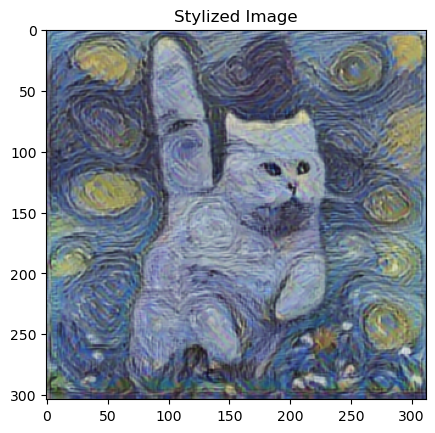

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def load_image(image):
    img=tf.io.read_file(image)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = img[tf.newaxis,:]
    return img

def images(image):
    if len(image.shape)>3:
        image=tf.squeeze(image,[0])
        plt.imshow(image)
        plt.title("Stylized Image")

content=load_image('content_image.jpg')
style=load_image('style_image (1).jpg')

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
output=model(tf.constant(content),tf.constant(style))[0]
images(output)
plt.show()

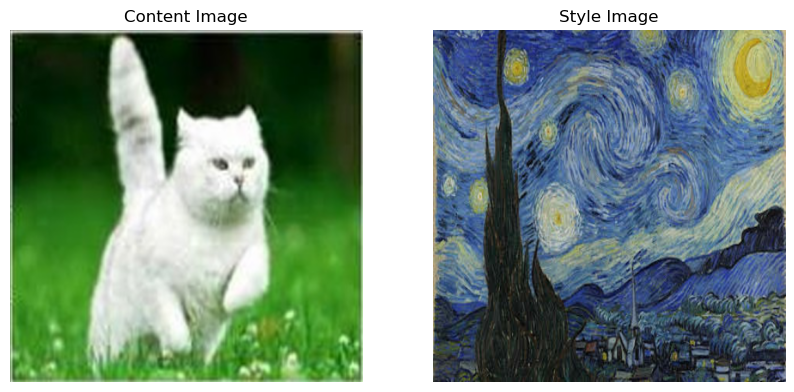

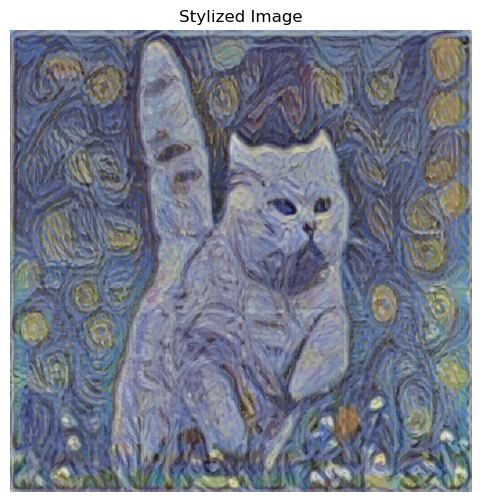

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (512, 512))  # Resize for consistency
    img = img[tf.newaxis, :]
    return img

def show_image(image, title='Image'):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

# Load images
content_image = load_image('content_image.jpg')
style_image = load_image('style_image (1).jpg')

# Show input images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_image(content_image, 'Content Image')
plt.subplot(1, 2, 2)
show_image(style_image, 'Style Image')
plt.show()

# Load style transfer model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# Show result
plt.figure(figsize=(6, 6))
show_image(stylized_image, 'Stylized Image')
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Function to load and preprocess image
def load_image(image_path):
    # Read the image from the file path
    img = tf.io.read_file(image_path)
    # Decode the image into an RGB format (3 channels)
    img = tf.image.decode_image(img, channels=3)
    # Convert image to float32 type in range [0, 1]
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to (512, 512) for consistency
    img = tf.image.resize(img, (512, 512))
    # Add batch dimension (1, 512, 512, 3)
    img = img[tf.newaxis, :]
    return img

# Function to display image using matplotlib
def show_image(image, title='Image'):
    # If the image has more than 3 dimensions (batch), remove the batch dimension
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    # Display the image using matplotlib
    plt.imshow(image)
    plt.title(title)  # Set the title of the image
    plt.axis('off')  # Hide the axes for better visualization

# Load the content image (the image we want to apply the style to)
content_image = load_image('content_image.jpg')  # Path to the content image

# Load the style image (the image whose style we want to apply)
style_image = load_image('style_image (1).jpg')  # Path to the style image

# Display both content and style images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_image(content_image, 'Content Image')  # Display content image
plt.subplot(1, 2, 2)
show_image(style_image, 'Style Image')  # Display style image
plt.show()  # Show both images

# Load the pre-trained style transfer model from TensorFlow Hub
# This model applies arbitrary style transfer using a content image and style image
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply the style transfer using the model
# The model takes the content image and style image as inputs and outputs the stylized image
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# Display the final stylized image that combines content and style
plt.figure(figsize=(6, 6))
show_image(stylized_image, 'Stylized Image')  # Show the output image
plt.show()  # Display the image


In [ ]:
Explanation of Key Sections:
Import Libraries:

tensorflow is used for loading and processing images, applying the style transfer model, and performing tensor operations.

tensorflow_hub is used to load the pre-trained style transfer model from Google's Magenta project.

matplotlib.pyplot is used for displaying images.

load_image Function:

Reads an image from the specified file path, decodes it, resizes it to a consistent size of 512x512, and normalizes it.

The image is also expanded to have a batch dimension since the model expects a batch input ((1, 512, 512, 3)).

show_image Function:

Displays an image using matplotlib, and removes axis labels for clarity.

Loading and Displaying Input Images:

The content and style images are loaded using the load_image function and displayed side by side for comparison.

Loading the Pre-trained Model:

The style transfer model is loaded from TensorFlow Hub, which applies arbitrary image stylization.

Applying Style Transfer:

The content and style images are fed to the model, which generates the stylized output.

Displaying the Output:

The result of the style transfer is displayed using matplotlib.

Key Notes:
The code applies a pre-trained model that performs style transfer, meaning it blends the content of one image with the style of another.

The result is a combination of the content image with the artistic style applied from the style image.